In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
original_df = sns.load_dataset('penguins')
df = original_df.copy()
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [3]:
missing_data = df.isna().sum()
percntage_missing_data = missing_data*100/df.count()
percntage_missing_data
df.duplicated().sum()
df = df.dropna()
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [4]:
columns = ['sex', 'body_mass_g', 'island','species']
df_before_preperation = df[columns]
df_before_preperation

,sex,body_mass_g,island,species
0,Male,3750.0,Torgersen,Adelie
1,Female,3800.0,Torgersen,Adelie
2,Female,3250.0,Torgersen,Adelie
4,Female,3450.0,Torgersen,Adelie
5,Male,3650.0,Torgersen,Adelie
...,...,...,...,...
338,Female,4925.0,Biscoe,Gentoo
340,Female,4850.0,Biscoe,Gentoo
341,Male,5750.0,Biscoe,Gentoo
342,Female,5200.0,Biscoe,Gentoo


In [6]:
df_binary = pd.get_dummies(df,columns=['sex','island'],drop_first=[True,False],dtype=int)
# df_binary = pd.get_dummies(df_binary,columns=['island'],dtype=int)
df_binary

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex_Male,island_Dream,island_Torgersen
0,Adelie,39.1,18.7,181.0,3750.0,1,0,1
1,Adelie,39.5,17.4,186.0,3800.0,0,0,1
2,Adelie,40.3,18.0,195.0,3250.0,0,0,1
4,Adelie,36.7,19.3,193.0,3450.0,0,0,1
5,Adelie,39.3,20.6,190.0,3650.0,1,0,1
...,...,...,...,...,...,...,...,...
338,Gentoo,47.2,13.7,214.0,4925.0,0,0,0
340,Gentoo,46.8,14.3,215.0,4850.0,0,0,0
341,Gentoo,50.4,15.7,222.0,5750.0,1,0,0
342,Gentoo,45.2,14.8,212.0,5200.0,0,0,0


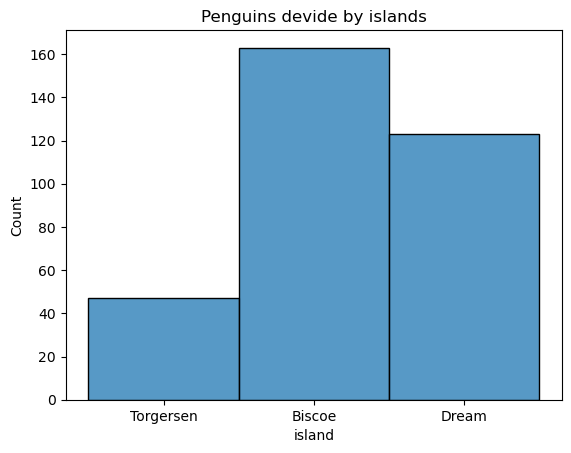

In [7]:
sns.histplot(data=df_before_preperation,x='island')
plt.xlabel('island')
plt.title('Penguins devide by islands')
plt.show()

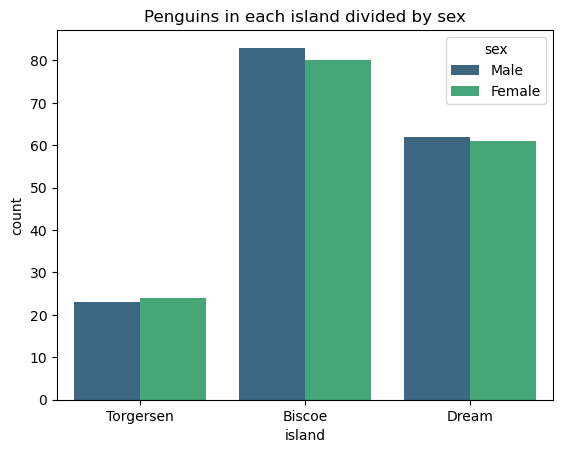

In [8]:
sns.countplot(data=df_before_preperation,x='island',hue='sex',palette='viridis')
plt.xlabel('island')
plt.title('Penguins in each island divided by sex')
plt.show()

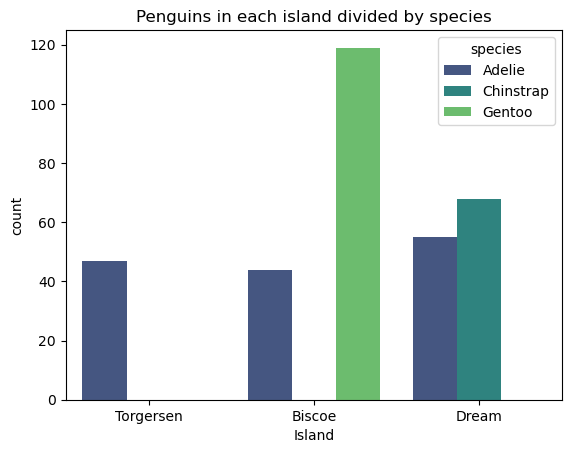

In [9]:
sns.countplot(data=df_before_preperation,x='island',hue='species',palette='viridis')
plt.xlabel('Island')
plt.title('Penguins in each island divided by species')
plt.show()

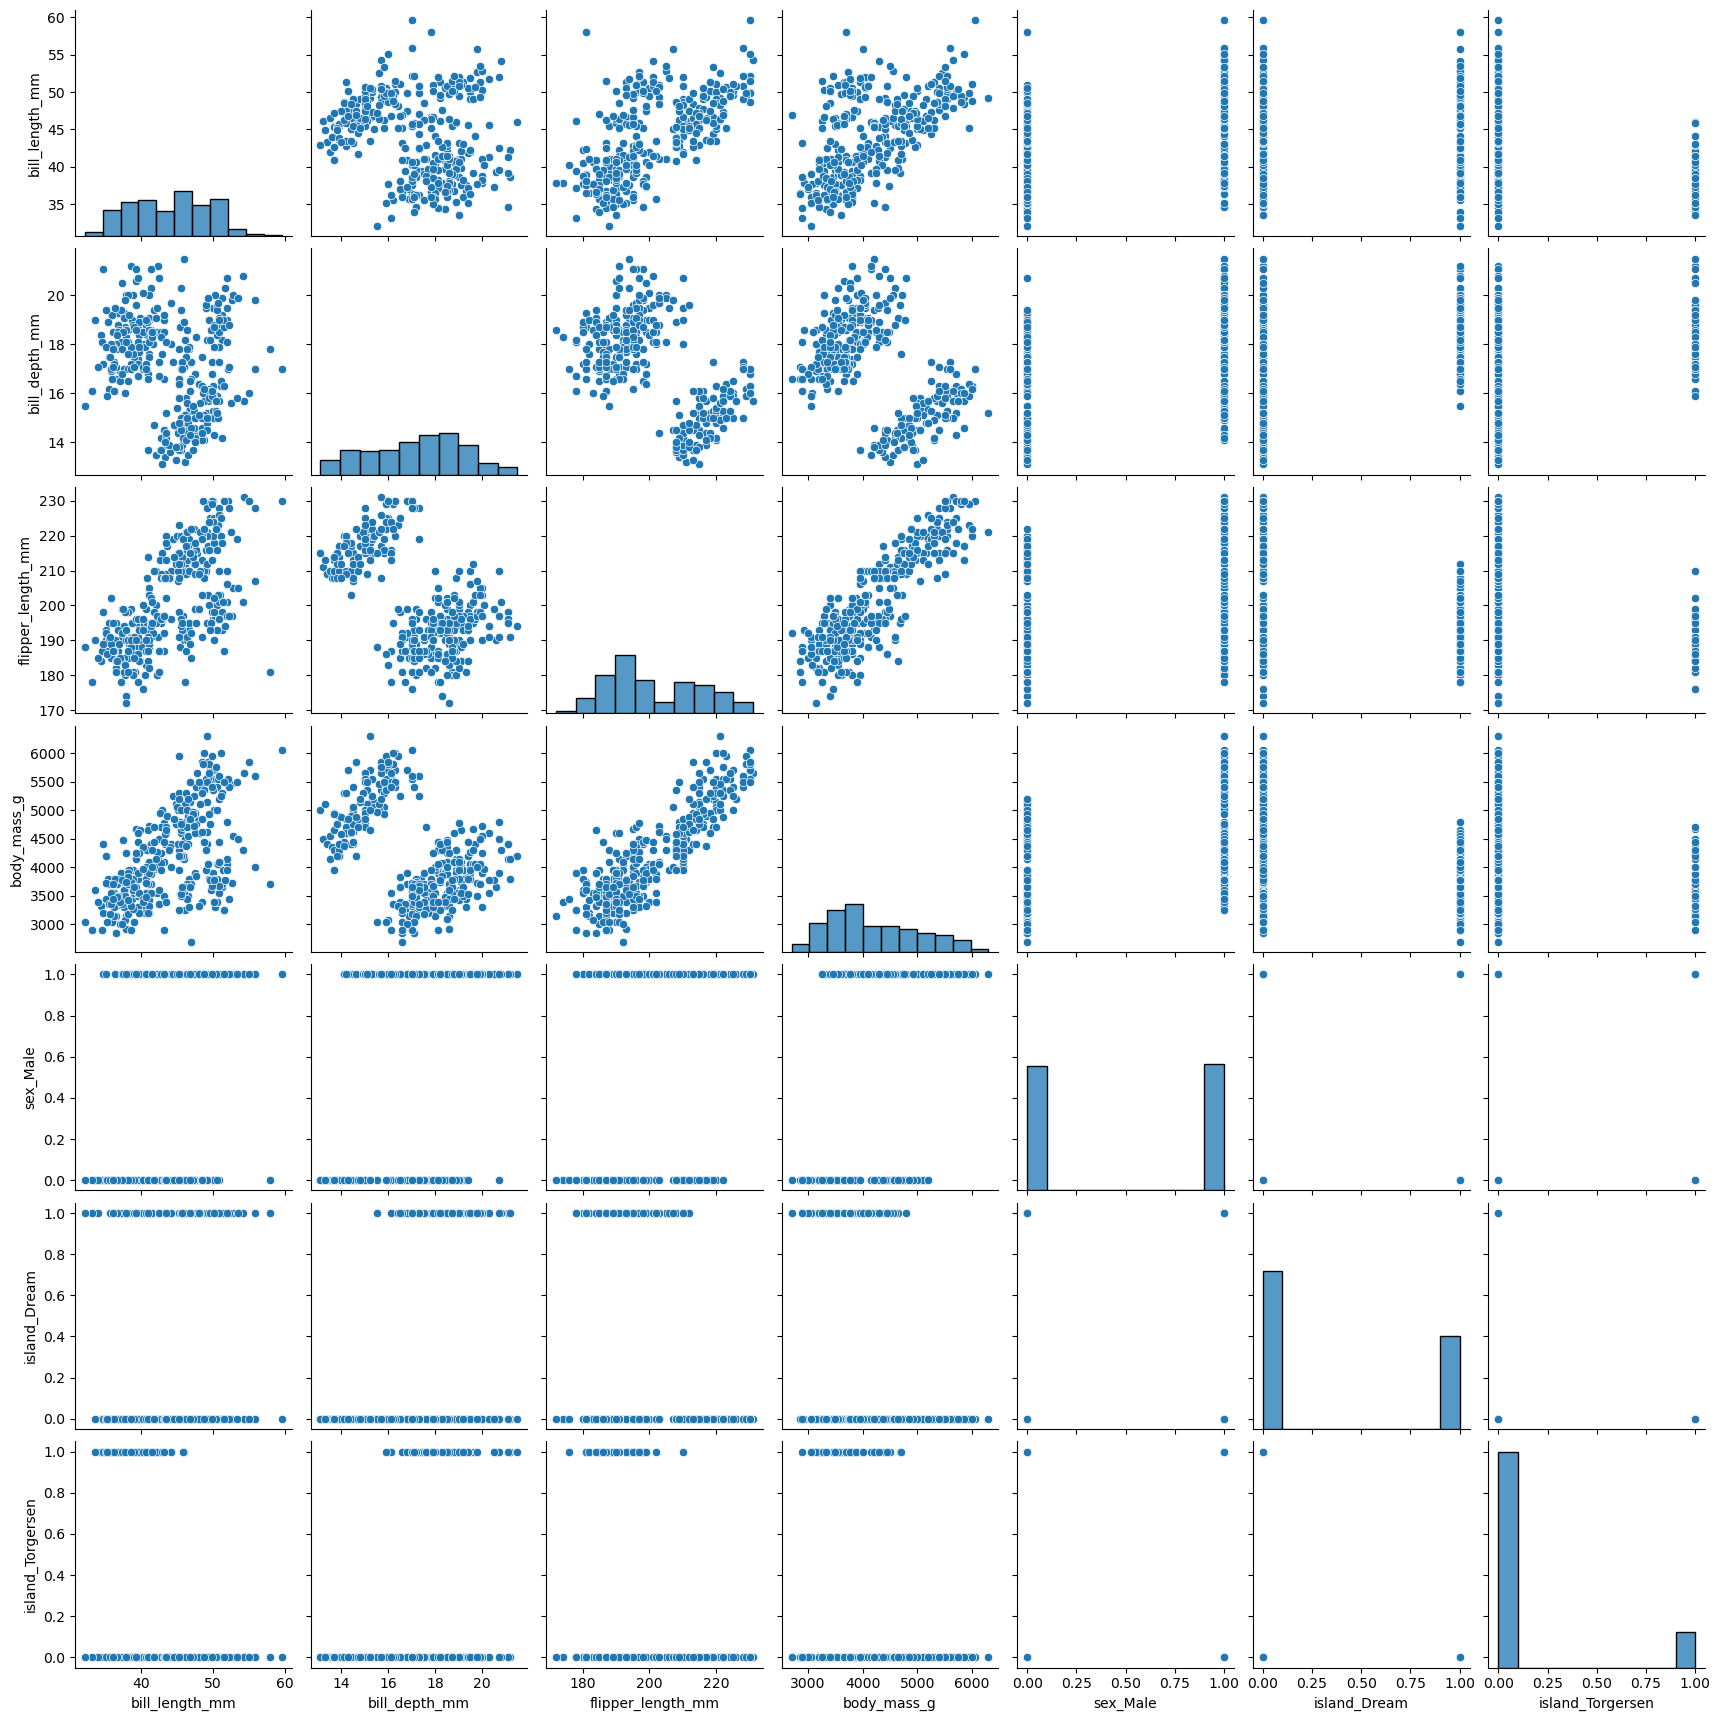

In [10]:
sns.pairplot(data=df_binary)
plt.show()

In [11]:
X = df_binary.drop('species',axis=1)
y = df_binary['species']

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import confusion_matrix, classification_report

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

scalar = StandardScaler()
scalar_X_train = scalar.fit_transform(X_train)
scalar_X_test = scalar.transform(X_test)

log_cv_model = LogisticRegressionCV(cv=5,max_iter=10000,multi_class='multinomial',solver='saga',penalty='l1',Cs=(1,4,10))
log_cv_model.fit(scalar_X_train,y_train)
print(log_cv_model.coef_)
print(log_cv_model.C_)

[[-4.8206308   1.13500487  0.          0.          0.65572903  0.
   0.        ]
 [ 0.17915702  0.          0.          0.         -0.42011178  2.04065948
   0.        ]
 [ 0.         -2.10931133  0.21034957  1.0125019   0.         -0.26223795
   0.        ]]
[1 1 1]


In [18]:
y_pred = log_cv_model.predict(scalar_X_test)
print(y_pred)
len(y_pred)

['Adelie' 'Gentoo' 'Adelie' 'Chinstrap' 'Adelie' 'Gentoo' 'Gentoo'
 'Chinstrap' 'Chinstrap' 'Chinstrap' 'Adelie' 'Adelie' 'Gentoo' 'Adelie'
 'Gentoo' 'Adelie' 'Adelie' 'Chinstrap' 'Adelie' 'Gentoo' 'Adelie'
 'Adelie' 'Gentoo' 'Chinstrap' 'Adelie' 'Adelie' 'Gentoo' 'Gentoo'
 'Chinstrap' 'Gentoo' 'Chinstrap' 'Gentoo' 'Adelie' 'Adelie' 'Gentoo'
 'Gentoo' 'Chinstrap' 'Gentoo' 'Adelie' 'Adelie' 'Adelie' 'Adelie'
 'Chinstrap' 'Chinstrap' 'Adelie' 'Adelie' 'Gentoo' 'Adelie' 'Adelie'
 'Gentoo' 'Adelie' 'Gentoo' 'Gentoo' 'Adelie' 'Adelie' 'Gentoo' 'Adelie'
 'Adelie' 'Chinstrap' 'Chinstrap' 'Gentoo' 'Gentoo' 'Gentoo' 'Adelie'
 'Adelie' 'Gentoo' 'Adelie' 'Gentoo' 'Adelie' 'Gentoo' 'Adelie' 'Adelie'
 'Gentoo' 'Gentoo' 'Gentoo' 'Chinstrap' 'Adelie' 'Adelie' 'Adelie'
 'Gentoo' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Gentoo' 'Gentoo' 'Adelie'
 'Gentoo' 'Chinstrap' 'Chinstrap' 'Gentoo' 'Gentoo' 'Adelie' 'Adelie'
 'Adelie' 'Adelie' 'Adelie' 'Chinstrap' 'Adelie' 'Adelie']


100

In [19]:
report = classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

      Adelie       0.98      1.00      0.99        48
   Chinstrap       1.00      0.94      0.97        18
      Gentoo       1.00      1.00      1.00        34

    accuracy                           0.99       100
   macro avg       0.99      0.98      0.99       100
weighted avg       0.99      0.99      0.99       100



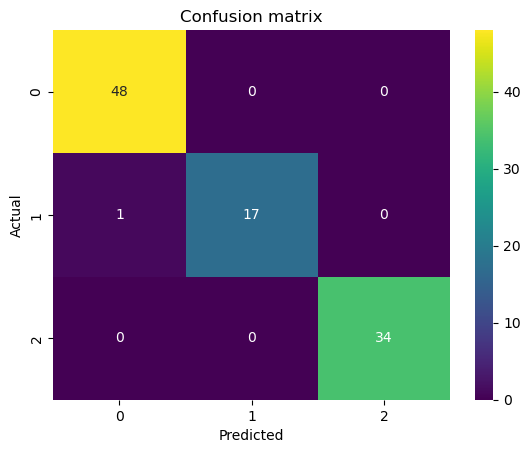

In [20]:
cm = confusion_matrix(y_test,y_pred)
cmap = plt.cm.viridis

sns.heatmap(cm, annot=True, fmt="d", cmap = cmap)

plt.title('Confusion matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# The model is 99 percent accurate, we can try to use lower lamdas